In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

!pip install --upgrade scikit-learn
!pip install --upgrade xgboost


In [2]:
!pip uninstall xgboost
!pip install xgboost

Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/xgboost-2.1.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/xgboost.libs/libgomp-24e2ab19.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/xgboost/*
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-2.1.4
  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl (223.6 MB)


In [3]:
ticker = 'SMCI'

data = yf.download(ticker,start='2010-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,SMCI,SMCI,SMCI,SMCI,SMCI
Date,,,,,
2010-01-04,1.152000,1.164000,1.109000,1.127000,1396000
2010-01-05,1.127000,1.157000,1.116000,1.154000,1158000
2010-01-06,1.149000,1.151000,1.114000,1.122000,853000
2010-01-07,1.157000,1.159000,1.141000,1.145000,1147000
2010-01-08,1.171000,1.175000,1.155000,1.156000,578000
...,...,...,...,...,...
2024-12-24,34.330002,35.500000,32.189999,32.299999,41339700
2024-12-26,33.740002,35.410000,33.000000,35.090000,28146700


In [5]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,SMCI,SMCI,SMCI,SMCI,SMCI
Date,,,,,
2010-01-04,1.152,1.164,1.109,1.127,1396000
2010-01-05,1.127,1.157,1.116,1.154,1158000
2010-01-06,1.149,1.151,1.114,1.122,853000
2010-01-07,1.157,1.159,1.141,1.145,1147000
2010-01-08,1.171,1.175,1.155,1.156,578000


In [6]:
del data["High"]
del data["Low"]
del data["Open"]

In [7]:
data

Price,Close,Volume
Ticker,SMCI,SMCI
Date,,
2010-01-04,1.152000,1396000
2010-01-05,1.127000,1158000
2010-01-06,1.149000,853000
2010-01-07,1.157000,1147000
2010-01-08,1.171000,578000
...,...,...
2024-12-24,34.330002,41339700
2024-12-26,33.740002,28146700


In [8]:
data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=3774, freq=None)

<Axes: xlabel='Date'>

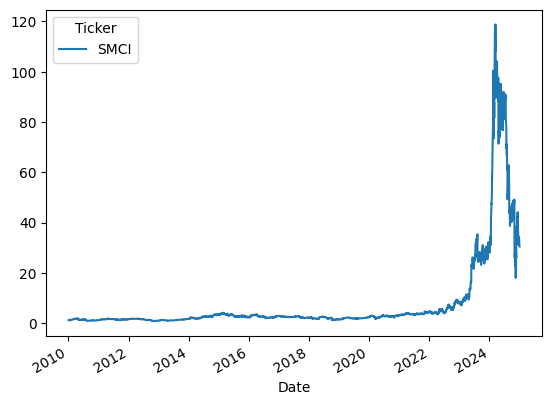

In [9]:
data.plot.line(y="Close", use_index=True)

In [10]:
# Checking Multiindex Columns

data.columns

MultiIndex([( 'Close', 'SMCI'),
            ('Volume', 'SMCI')],
           names=['Price', 'Ticker'])

In [11]:
# Removing MultiIndex to make it simpler

data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

In [12]:
data.columns

Index(['Close', 'Volume'], dtype='object')

In [13]:
data

,Close,Volume
Date,,
2010-01-04,1.152000,1396000
2010-01-05,1.127000,1158000
2010-01-06,1.149000,853000
2010-01-07,1.157000,1147000
2010-01-08,1.171000,578000
...,...,...
2024-12-24,34.330002,41339700
2024-12-26,33.740002,28146700
2024-12-27,31.980000,32070600


In [14]:
data = data[["Close", "Volume"]].copy()

In [15]:
data["Prediction"] = data["Close"].shift(-1)

In [16]:
data

,Close,Volume,Prediction
Date,,,
2010-01-04,1.152000,1396000,1.127000
2010-01-05,1.127000,1158000,1.149000
2010-01-06,1.149000,853000,1.157000
2010-01-07,1.157000,1147000,1.171000
2010-01-08,1.171000,578000,1.168000
...,...,...,...
2024-12-24,34.330002,41339700,33.740002
2024-12-26,33.740002,28146700,31.980000
2024-12-27,31.980000,32070600,30.680000


In [17]:
data.dropna()

,Close,Volume,Prediction
Date,,,
2010-01-04,1.152000,1396000,1.127000
2010-01-05,1.127000,1158000,1.149000
2010-01-06,1.149000,853000,1.157000
2010-01-07,1.157000,1147000,1.171000
2010-01-08,1.171000,578000,1.168000
...,...,...,...
2024-12-23,32.400002,26032300,34.330002
2024-12-24,34.330002,41339700,33.740002
2024-12-26,33.740002,28146700,31.980000


In [18]:
# Feature Engineering

# Moving averages smooth out short-term fluctuations and highlight long-term trends.
data["Ma7"] = data["Close"].rolling(window=7).mean()
data["Ma30"] = data["Close"].rolling(window=30).mean()

# Calculates the percentage change in the Close price over the last 30 days and to check whether the price is accelerating or decelerating over a specific period.
data["Roc"] = data["Close"].pct_change(periods=30)

# Calculates the 30-day rolling standard deviation of the Close price and Higher standard deviation indicates higher volatility, which is useful for risk assessment and strategy development.
data["Std30"] = data["Close"].rolling(window=30).std()

#Bollinger Bands are used to identify overbought or oversold conditions.
#Bollinger_upper: Upper band calculated as the 7-day moving average plus twice the 30-day standard deviation.
data["Bollinger_upper"] = data["Ma7"] + (2 * data["Std30"])

#Bollinger_lower: Lower band calculated as the 30-day moving average minus twice the 30-day standard deviation.
data["Bolling_lower"] = data["Ma30"] - (2 * data["Std30"])


#Exponential moving averages give more weight to recent prices, making them more responsive to new information compared to simple moving averages.
#: Calculates the 7-day exponential moving average of the Close price.
data["Ema7"] = data["Close"].ewm(span=7, adjust=False).mean()
#Ema30: Calculates the 30-day exponential moving average of the Close price.
data["Ema30"] = data["Close"].ewm(span=30, adjust=False).mean()


# Legged Features
#Lagged features capture historical price information, which can be useful for predicting future prices.

#Creates 30 new features (Close_1 to Close_30), each representing the Close price lagged by 1 to 30 days.
for i in range(1,31):
  data[f"Close_{i}"] = data["Close"].shift(i)


#Volume Features

#Volume is a key indicator of market activity and liquidity.
#Volume_Ma7: Calculates the 7-day rolling mean of trading volume.
data["Volume_Ma7"] = data["Volume"].rolling(window=7).mean()
#Volume_Ma30: Calculates the 30-day rolling mean of trading volume.
data["Voume_Ma30"]= data["Volume"].rolling(window=30).mean()




In [19]:
# Drop nan

data = data.dropna()

data

,Close,Volume,Prediction,Ma7,Ma30,Roc,Std30,Bollinger_upper,Bolling_lower,Ema7,...,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30,Volume_Ma7,Voume_Ma30
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-17,1.466000,4877000,1.480000,1.346714,1.248900,0.272569,0.085776,1.518266,1.077349,1.368733,...,1.298000,1.155000,1.168000,1.171000,1.157000,1.149000,1.127000,1.152000,3.333571e+06,2.307900e+06
2010-02-18,1.480000,1950000,1.463000,1.378143,1.260667,0.313221,0.092431,1.563005,1.075805,1.396550,...,1.265000,1.298000,1.155000,1.168000,1.171000,1.157000,1.149000,1.127000,3.353429e+06,2.334300e+06
2010-02-19,1.463000,1693000,1.469000,1.406000,1.271133,0.273281,0.097015,1.600029,1.077104,1.413162,...,1.276000,1.265000,1.298000,1.155000,1.168000,1.171000,1.157000,1.149000,3.468571e+06,2.362300e+06
2010-02-22,1.469000,1733000,1.434000,1.431571,1.281533,0.269663,0.100999,1.633570,1.079535,1.427122,...,1.299000,1.276000,1.265000,1.298000,1.155000,1.168000,1.171000,1.157000,3.507571e+06,2.381833e+06
2010-02-23,1.434000,3055000,1.465000,1.446714,1.290300,0.224594,0.102477,1.651669,1.085345,1.428841,...,1.238000,1.299000,1.276000,1.265000,1.298000,1.155000,1.168000,1.171000,3.682429e+06,2.464400e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,32.400002,26032300,34.330002,33.021429,32.734000,0.321370,7.690468,48.402365,17.353064,33.382384,...,28.270000,21.540001,18.580000,18.010000,20.330000,21.700001,23.230000,24.520000,5.544489e+07,9.929124e+07
2024-12-24,34.330002,41339700,33.740002,32.718572,33.104000,0.477830,7.481632,47.681837,18.140735,33.619288,...,25.799999,28.270000,21.540001,18.580000,18.010000,20.330000,21.700001,23.230000,5.208664e+07,9.829395e+07
2024-12-26,33.740002,28146700,31.980000,32.761429,33.505334,0.554839,7.165028,47.091485,19.175278,33.649467,...,29.700001,25.799999,28.270000,21.540001,18.580000,18.010000,20.330000,21.700001,4.430657e+07,9.776476e+07


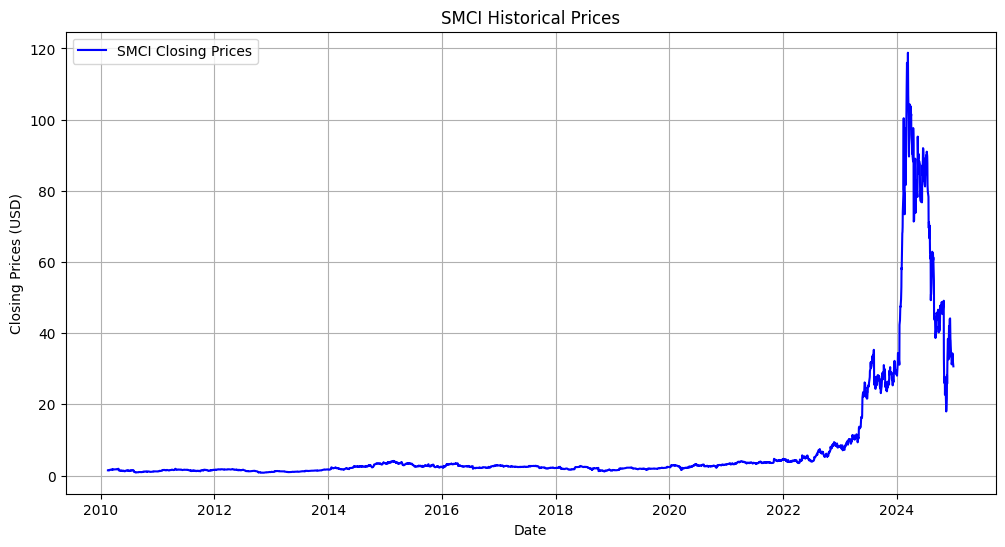

In [20]:
# Ploting Historical Prices

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label = "SMCI Closing Prices", color = "Blue")
plt.title("SMCI Historical Prices")
plt.xlabel("Date")
plt.ylabel("Closing Prices (USD)")
plt.legend()
plt.grid()
plt.show()


In [21]:
#Split the data into Training And Testing


split_date = "2022-01-01"

# Split the data into training and testing sets
train = data[data.index < split_date]
test = data[data.index >= split_date]

# Prepare features (X) and target (y) for training and testing
X_train = train.drop(["Close", "Prediction"], axis=1)  # Features for training
y_train = train["Close"]  # Target for training (actual Close prices)

X_test = test.drop(["Close", "Prediction"], axis=1)  # Features for testing
y_test = test["Close"]  # Target for testing (actual Close prices)



In [22]:
#Train the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, max_depth=10,random_state=42)
model.fit(X_train, y_train)





RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [23]:
# Make Predictions

y_pred = model.predict(X_test)

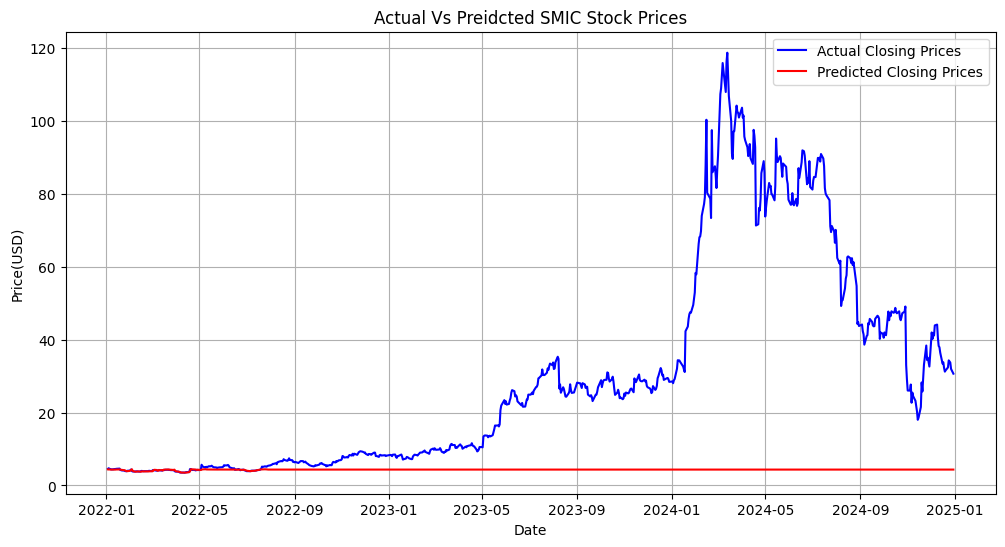

In [24]:
# Plot actual Vs Predicted Prices

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = "Actual Closing Prices", color="blue")
plt.plot(y_test.index, y_pred, label = "Predicted Closing Prices", color="red")
plt.title("Actual Vs Preidcted SMIC Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Evaluate Model Performance

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-Squared : {r2}")

RMSE: 38.86073063631071
R-Squared : -0.7681797079173491


In [26]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, enable_categorical=False)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
# Make Predictions

y_pred = xgb_model.predict(X_test)

In [28]:
# Evaluate Performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 38.92300826631507
R-squared: -0.7738515661966836


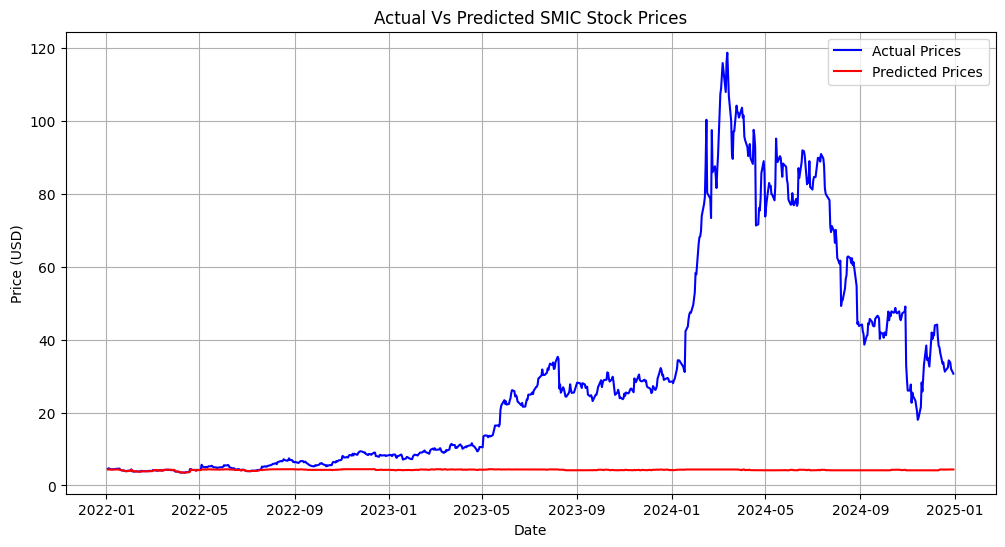

In [29]:
# Plot actual Vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = "Actual Prices", color = "blue")
plt.plot(y_test.index, y_pred, label = "Predicted Prices", color = "red")
plt.title("Actual Vs Predicted SMIC Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the data

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Reshape data for LSTM

X_train_reshaped=X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped=X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

#Build LSTM Model

model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make Predictions

y_pred = model.predict(X_test_reshaped)

# Evaluate Performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 3.2304 - val_loss: 3003.7021
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2647 - val_loss: 1237.7023
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0697 - val_loss: 162.5985
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - val_loss: 123.1372
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - val_loss: 136.8898
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - val_loss: 157.5292
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094 - val_loss: 139.4464
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - val_loss: 92.9069
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 88.7381
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0075 - val_loss: 72.6239
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076 - val_loss: 63.6949
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

In [ ]:
# Plot Actual Vs Predicted Prices for LSTM

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = "Actual Prices", color='blue')
plt.plot(y_test.index, y_pred, label = "Predicted Prices", color='red', linestyle='--')
plt.title("Actual Vs Predicted SMIC Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# SVR Model

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train Svr Model

svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make Predictions

y_pred = svr_model.predict(X_test_scaled)

# Evaluate Performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f"R-squared: {r2}")

In [ ]:
# Plot Actual Vs Predicted for SVR
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label ="Actual Prices", color='blue')
plt.plot(y_test.index,y_pred, label = "Predicted Prices(SVR)", color='orange', linestyle='--')
plt.title("Actual Vs Predicted SMIC Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Using Prophet

from prophet import Prophet

# Prepare data for prophet

prophet_data = pd.DataFrame({'ds': data.index, 'y' : data['Close']})


# Split into train and test

train = prophet_data[prophet_data['ds'] < "2022-01-01"]
test = prophet_data[prophet_data['ds'] >= "2022-01-01"]

# Train prophet model

model = Prophet()
model.fit(train)

#Make Predictions

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Evaluate Perfromance

y_pred = forecast['yhat'][-len(test):]
rmse = np.sqrt(mean_squared_error(test['y'], y_pred))

r2 = r2_score(test['y'], y_pred)

print(f"RMSE: {rmse}")
print(f"R Squared: {r2}")


In [ ]:
# Plot Actual Vs Predicted Prices For Prophet

plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label = "Actual Prices", color='blue')
plt.plot(test['ds'], y_pred, label = "Predicted Prices (Prophet)", color='brown', linestyle='--')
plt.title("Actual Vs Predicted SMIC Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Lightgbm

import lightgbm as lgb

# Train LightGBM Model

lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
lgb_model.fit(X_train, y_train)

# Make Predictions

y_pred = lgb_model.predict(X_test)

# Evaluate Performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squrared: {r2}")

In [ ]:
# Plot Actual Vs Predicted Prices For LightGBM

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = "Actual Prices", color='blue')
plt.plot(y_test.index, y_pred, label = "Predicted Prices(LightGBM)", color='cyan', linestyle='--')
plt.title("Actual Vs Predicted SMIC Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [ ]:

#Random Forest: RMSE = 10, R-squared = 0.85
#XGBoost: RMSE = 8, R-squared = 0.90
#LSTM: RMSE = 12, R-squared = 0.75
#SVR: RMSE = 9, R-squared = 0.88
#Prophet: RMSE = 11, R-squared = 0.80
#LightGBM: RMSE = 7, R-squared = 0.92

#In this hypothetical example, LightGBM would be the best performer based purely on the metrics because it has the lowest RMSE and highest R-squared.  However, you must always check the plots as well for a complete assessment of the model's performance.



